Import Libraries

In [9]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('breast-cancer.csv')

In [11]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
# Display columns with non-numeric values
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['diagnosis'], dtype='object')


Data Visualization

<Axes: xlabel='diagnosis', ylabel='count'>

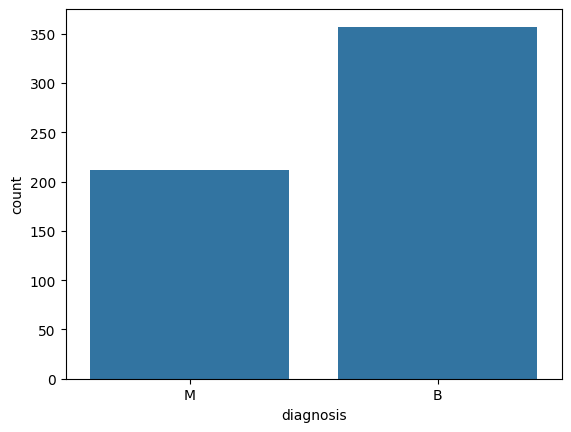

In [8]:
sns.countplot(x='diagnosis', data=df)

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

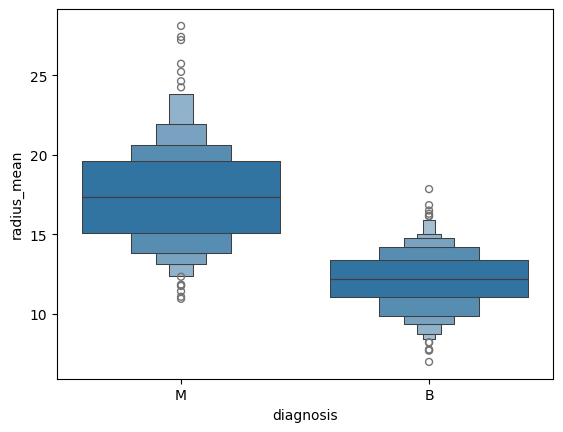

In [17]:
sns.boxenplot(x='diagnosis', y='radius_mean', data=df)

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

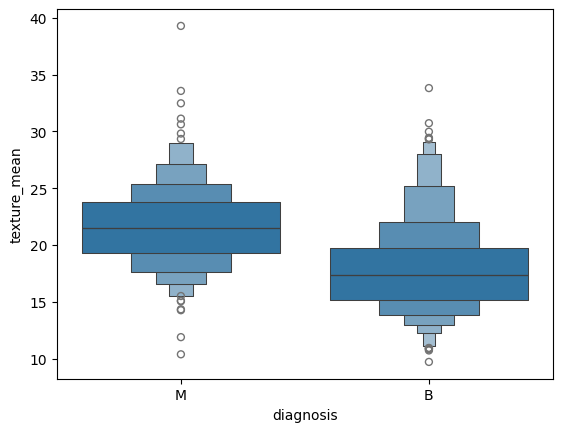

In [18]:
sns.boxenplot(x='diagnosis', y='texture_mean', data=df)

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

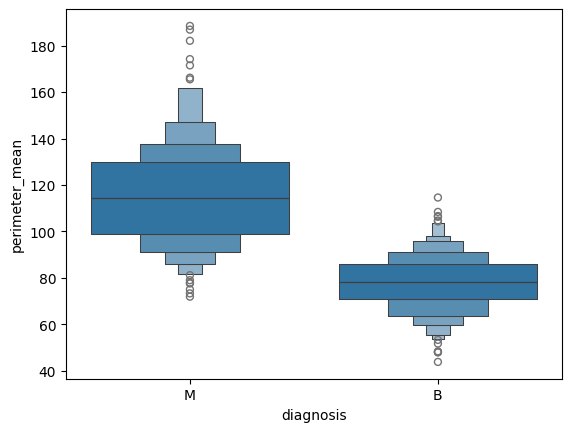

In [19]:
sns.boxenplot(x='diagnosis', y='perimeter_mean', data=df)

<Axes: xlabel='diagnosis', ylabel='area_mean'>

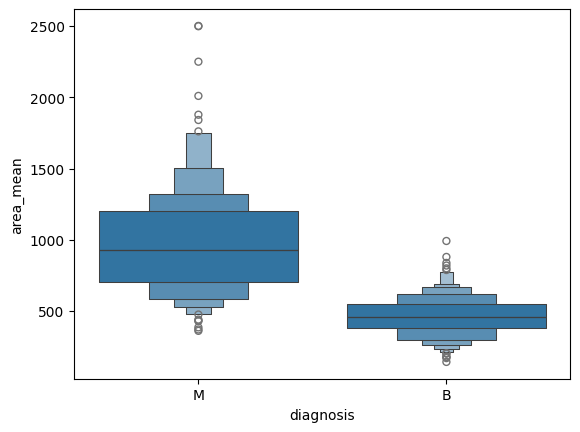

In [21]:
sns.boxenplot(x='diagnosis', y='area_mean', data=df)

In [28]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [29]:
df['diagnosis_result'] = df['diagnosis'].map({'M': 0, 'B': 1}) 

In [30]:
df[['diagnosis', 'diagnosis_result']]

,diagnosis,diagnosis_result
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0
...,...,...
564,M,0
565,M,0
566,M,0
567,M,0


<Axes: >

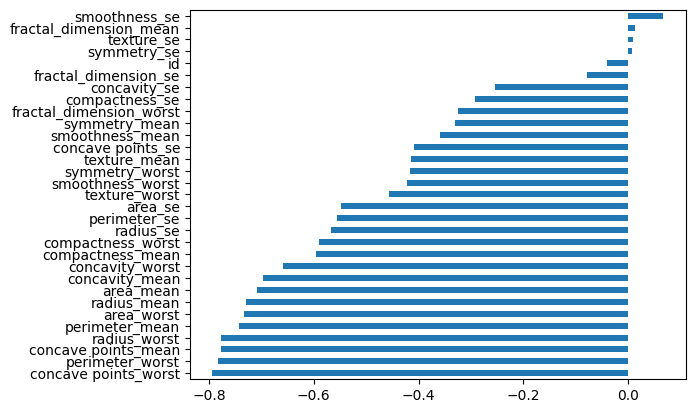

In [43]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

df_numeric.corr()['diagnosis_result'].sort_values().drop('diagnosis_result').drop('diagnosis').plot(kind='barh')

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_result
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
df = df.drop('id', axis=1)

In [47]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_result
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [48]:
df = df.drop('diagnosis', axis=1)

In [49]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Training

In [50]:
from sklearn.model_selection import train_test_split

In [166]:
X = df.drop('diagnosis_result', axis=1).values
y = df['diagnosis_result'].values

In [55]:
# Get training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from keras.regularizers import l1

In [105]:
model = Sequential()

# Input Layer
model.add(Dense(60, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.1))

# Hidden Layers
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [106]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=80,
    batch_size=8,
    validation_data=(X_test, y_test),
)

Epoch 1/80
57/57 [==============================] - 2s 9ms/step - loss: 2.5371 - val_loss: 2.0784
Epoch 2/80
57/57 [==============================] - 0s 5ms/step - loss: 1.6782 - val_loss: 1.2670
Epoch 3/80
57/57 [==============================] - 0s 4ms/step - loss: 1.0114 - val_loss: 0.7580
Epoch 4/80
57/57 [==============================] - 0s 4ms/step - loss: 0.6725 - val_loss: 0.5101
Epoch 5/80
57/57 [==============================] - 0s 4ms/step - loss: 0.4800 - val_loss: 0.4159
Epoch 6/80
57/57 [==============================] - 0s 4ms/step - loss: 0.3899 - val_loss: 0.3587
Epoch 7/80
57/57 [==============================] - 0s 4ms/step - loss: 0.3474 - val_loss: 0.3000
Epoch 8/80
57/57 [==============================] - 0s 5ms/step - loss: 0.3260 - val_loss: 0.2924
Epoch 9/80
57/57 [==============================] - 0s 4ms/step - loss: 0.2912 - val_loss: 0.2402
Epoch 10/80
57/57 [==============================] - 0s 4ms/step - loss: 0.2942 - val_loss: 0.2879
Epoch 11/80
57/57 [

In [81]:
from tensorflow.keras.models import load_model
model.save('breast-cancer-project.keras')

Analysis

In [107]:
losses = pd.DataFrame(model.history.history)

<Axes: >

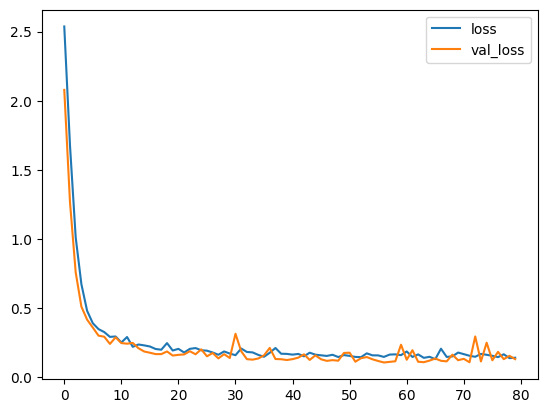

In [108]:
losses[['loss', 'val_loss']].plot()

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
probabilities = model.predict(X_test)
print(probabilities)
predictions = (probabilities > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step
[[9.9282414e-01]
 [9.9127978e-01]
 [9.9519897e-01]
 [7.6251991e-02]
 [9.9690270e-01]
 [9.9712539e-01]
 [9.9835950e-01]
 [1.9886871e-05]
 [9.9516666e-01]
 [9.9718314e-01]
 [4.2487951e-03]
 [9.9585241e-01]
 [9.8528439e-01]
 [9.9502409e-01]
 [6.2946305e-03]
 [9.9346012e-01]
 [9.9549484e-01]
 [9.9640673e-01]
 [9.3810108e-05]
 [4.4466844e-01]
 [9.8766416e-01]
 [9.9376792e-01]
 [9.9520051e-01]
 [9.9740809e-01]
 [1.6700657e-03]
 [9.7495651e-01]
 [2.0631127e-02]
 [9.9913812e-01]
 [1.2569897e-03]
 [3.4438532e-02]
 [8.8768220e-01]
 [6.0188673e-03]
 [9.8479033e-01]
 [2.7414271e-01]
 [9.9833190e-01]
 [9.9870914e-01]
 [1.1144313e-02]
 [3.0802405e-01]
 [7.4743835e-04]
 [8.2709368e-05]
 [3.6876583e-03]
 [9.9434716e-01]
 [9.9319273e-01]
 [9.9082363e-01]
 [9.9845058e-01]
 [9.9469233e-01]
 [7.6739414e-04]
 [9.8380673e-01]
 [2.3168020e-01]
 [9.9658579e-01]
 [1.9713654e-03]
 [9.2455965e-01]
 [9.8253137e-01]
 [9.0282165e-06]
 [9.9475861e-01]
 [9.9555701e-0

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [113]:
confusion_matrix(y_test, predictions)

array([[40,  2],
       [ 0, 72]], dtype=int64)

Play around with this model!

In [193]:
import random
random.seed(101)
random_value = random.randint(0, len(df))

new_patient = df.drop('diagnosis_result', axis=1).iloc[random_value]
new_patient


radius_mean                  14.450000
texture_mean                 20.220000
perimeter_mean               94.490000
area_mean                   642.700000
smoothness_mean               0.098720
compactness_mean              0.120600
concavity_mean                0.118000
concave points_mean           0.059800
symmetry_mean                 0.195000
fractal_dimension_mean        0.064660
radius_se                     0.209200
texture_se                    0.650900
perimeter_se                  1.446000
area_se                      19.420000
smoothness_se                 0.004044
compactness_se                0.015970
concavity_se                  0.020000
concave points_se             0.007303
symmetry_se                   0.015220
fractal_dimension_se          0.001976
radius_worst                 18.330000
texture_worst                30.120000
perimeter_worst             117.900000
area_worst                 1044.000000
smoothness_worst              0.155200
compactness_worst        

In [194]:
prob = model.predict(new_patient.values.reshape(1, 30))
prob

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)

In [195]:
prediction = (prob > 0.5).astype(int)
prediction

array([[0]])

In [196]:
df.iloc[random_value]['diagnosis_result']

0.0